# --------------------------------------- Workshop #3 -------------------------------------


* This workshop includes marked tasks that comprise 25% of your final mark in this module. 

* You need to read the examples in the 'Lecture #3 - examples' notebook to complete the tasks. 

# Task

## TASK 3.1: Apply four classifiers discussed in Lecture #3, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  (25%). 

## NOTE1: To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns. You don't need to apply the one hot encoder to nominal columns. 

## NOTE2 You are expected to improve your models in any way possible to get as high accuracy as possible.

## NOTE3: You should add comments on your code wherever necessary and briefly explain what the code is doing

## NOTE4: Completing the report cell is required only for reporting the three most important features. Other explanations are optional. 

## NOTE5: You will still get some marks if your code doesn't run, but you have written some codes and have added comments on the code. 


# Import Necessary Libraries

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np

# Importing the adult_WS#3 dataset

In [2]:
adult = pd.read_csv('adult_WS#3.csv')

# Data Exploration, Inspection and Cleaning

In [3]:
#print the whole dataset

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [4]:
#display the columns

adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#check for the null values

adult.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

> From our dataset, it is evident that we have null values which could be seen as wrong data, so we would move on to drop it and advance to reseting the index 


In [6]:
#ropping null values

adult.dropna(inplace=True)

#reindexing the dataset
adult.reset_index(drop=True, inplace=True)

# preparing data for classification

In [7]:
#seperating features from target

X = adult.drop(columns = 'income')
y = adult.iloc[:,-1]

In [8]:
#selecting the nominal and ordinal columns

nom_ord_col = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [9]:
#displaying the records of the nominal and ordinal 

X[nom_ord_col]

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
1,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,United-States
3,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
4,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...
9760,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,United-States
9761,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,United-States
9762,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
9763,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,United-States


In [10]:
# import ordinal encoder for encoding nominal and ordinal columns
from sklearn.preprocessing import OrdinalEncoder

#create an instance
ordinal_encoder = OrdinalEncoder()


> So i went on to fit the nominal and ordinal columns into the ordinal encoder, but i had to ensure i insert it into a dataframe else, it appears as an array

In [11]:
X_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X[nom_ord_col]))

In [12]:
#display the result

X_encoded

,0,1,2,3,4,5,6,7,8
0,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,38.0
1,4.0,15.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,0.0,9.0,12.0,2.0,0.0,5.0,4.0,0.0,38.0
3,4.0,8.0,10.0,2.0,6.0,0.0,4.0,1.0,38.0
4,4.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...
9760,4.0,15.0,9.0,4.0,12.0,3.0,4.0,0.0,38.0
9761,4.0,11.0,8.0,0.0,12.0,1.0,4.0,0.0,38.0
9762,4.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
9763,6.0,8.0,10.0,2.0,8.0,5.0,4.0,0.0,38.0


> The dataset has lost it original column name, i'll move on to rename the columns and concat it with the numerical columns

In [13]:
#get the numerical columns 

num_feat = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [14]:
#concat the dataset

X_concatenated = pd.concat([X[num_feat], X_encoded], axis=1)

In [39]:
#new columns

edit_col = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [40]:
#rename the columns

X_concatenated.columns = edit_col

In [41]:
#display the result

X_concatenated

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,29,216481,0,0,40,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,38.0
1,36,280570,0,0,45,4.0,15.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,25,100903,0,0,25,0.0,9.0,12.0,2.0,0.0,5.0,4.0,0.0,38.0
3,47,145636,0,0,48,4.0,8.0,10.0,2.0,6.0,0.0,4.0,1.0,38.0
4,33,119422,0,0,40,4.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,63363,0,0,30,4.0,15.0,9.0,4.0,12.0,3.0,4.0,0.0,38.0
9761,53,58535,0,0,40,4.0,11.0,8.0,0.0,12.0,1.0,4.0,0.0,38.0
9762,30,342709,0,0,40,4.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
9763,41,134724,3103,0,40,6.0,8.0,10.0,2.0,8.0,5.0,4.0,0.0,38.0


In [16]:
#normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X_concatenated)

In [17]:
X

array([[0.16438356, 0.15082783, 0.        , ..., 1.        , 0.        ,
        0.95      ],
       [0.26027397, 0.19816669, 0.        , ..., 1.        , 1.        ,
        0.95      ],
       [0.10958904, 0.06545702, 0.        , ..., 1.        , 0.        ,
        0.95      ],
       ...,
       [0.17808219, 0.24406519, 0.        , ..., 1.        , 1.        ,
        0.95      ],
       [0.32876712, 0.09043864, 0.03103031, ..., 1.        , 0.        ,
        0.95      ],
       [0.05479452, 0.17725055, 0.        , ..., 0.5       , 0.        ,
        0.95      ]])

In [18]:
#check the unique values

y.unique()

array(['>50K', '<=50K'], dtype=object)

In [20]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [21]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [22]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [24]:
X.shape,X_train.shape, X_test.shape

((9765, 14), (6835, 14), (2930, 14))

In [25]:
y.shape,y_train.shape, y_test.shape

((9765,), (6835,), (2930,))

# Classification

In [26]:
# defining the classification models 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#model pipeling

models = [svm.SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [28]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
#list to hold all cm for each 

cm_list = []

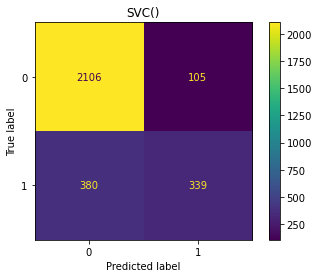

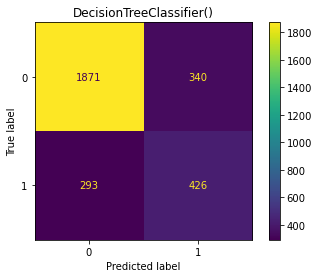

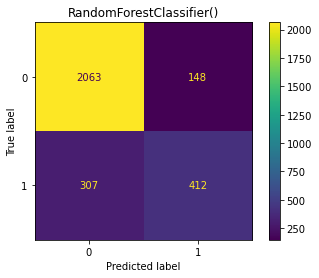

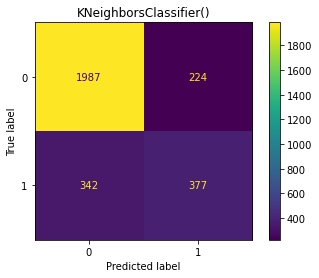

In [32]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    cm_list.append(cm)
    disp.plot()
    plt.title(model.__class__())


In [33]:
cm_list

[array([[2106,  105],
        [ 380,  339]], dtype=int64),
 array([[1871,  340],
        [ 293,  426]], dtype=int64),
 array([[2063,  148],
        [ 307,  412]], dtype=int64),
 array([[1987,  224],
        [ 342,  377]], dtype=int64)]

In [34]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [35]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm_list[0])
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm_list[1])
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm_list[2])
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm_list[3])
print('\n\n')

SVM metrics

True Positives: 339
True Negatives: 2106
False Positives: 105
False Negatives: 380
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.47
Specificity: 0.95
Precision: 0.95
f_1 Score: 0.63



DT metrics

True Positives: 426
True Negatives: 1871
False Positives: 340
False Negatives: 293
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.59
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.7



RF metrics

True Positives: 412
True Negatives: 2063
False Positives: 148
False Negatives: 307
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.57
Specificity: 0.93
Precision: 0.93
f_1 Score: 0.71



KNN metrics

True Positives: 377
True Negatives: 1987
False Positives: 224
False Negatives: 342
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.52
Specificity: 0.9
Precisi

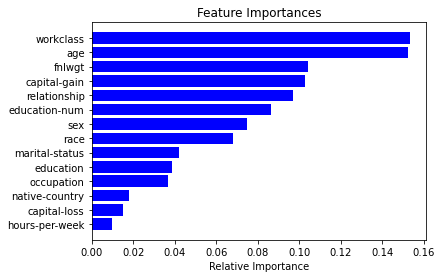

In [50]:
# Getting the most important features
features = adult.columns
importances = models[2].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

############# WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE)####################

1. **If Precision is Crucial:**
If minimizing false positives (precision) is crucial for your task, then Support Vector Machine (SVM) with a precision of 0.95 may be preferred.

2. **If Balanced Precision and Recall are Important:**
If you want a balance between precision and recall, Random Forest (RF) has a relatively high F1 Score of 0.71, suggesting a good compromise between precision and recall.

3. **If Identifying Positive Instances is a Priority:**
If identifying positive instances (sensitivity/recall) is a priority, Decision Tree (DT) has the highest sensitivity of 0.59.

4. **If Avoiding False Positives is a Priority:**
If avoiding false positives (specificity) is crucial, SVM has the highest specificity of 0.95.

5. **Overall Performance:**
If overall model performance (accuracy) is the primary concern and the difference in accuracy is acceptable, Random Forest (RF) has the highest accuracy of 0.84.


Using the Random Forest to plot the feature importance, it is evident that the three most important features are:
- Workclass
- age
- fnlwgt